## **Códigos en Python**

Escribe en Python un codigo que obtenga la factorización *LU* otro que obtenga la factorizacion *PLU* y otro que obtenga la
factorizacion de Cholesky de una matriz *A*. En caso de que la factorizacion no pueda realizarse sobre la matriz *A* tu codigo 
debe arrojar que es lo que la matriz *A* no cumple.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class InvalidInputMatrix(Exception):
    def __init__(self, message):
        super().__init__(message)

**NOTA:** Se comentaron las líneas que arrojan excepciones al introducir una matriz inválida, con el fin de agilizar los cálculos.

In [3]:
def lu_fact(A: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    LU decomposition of a square matrix A. 
    Matrix A must not contain any zero in the diagonal and must be invertible.

    Example
    --------
    >>> A = np.array([[3, 1, 1], [-3, -3, 1], [3, -3, 6]])
    >>> lu_fact(A)
    (array([[ 1.,  0.,  0.],
            [-1.,  1.,  0.],
            [ 1.,  2.,  1.]]), 
    array([[ 3,  1,  1],
          [ 0, -2,  2],
          [ 0,  0,  1]]))

    Parameters
    ----------
    A (ndarray) : nxn coefficient matrix

    Returns
    -------
    U (ndarray) : Upper triangular matrix
    L (ndarray) : Lower triangular matrix
    """
    # if np.linalg.det(A) == 0:
    #     raise InvalidInputMatrix('The matrix must be invertible.')
    m, n = np.shape(A)
    # if m != n:
    #     raise InvalidInputMatrix('The matrix must be square.')
    # if np.any(np.diag(A) == 0):
    #     raise InvalidInputMatrix('The matrix must not contain any zero in the diagonal.')
    L = np.zeros((n, n))
    U = np.copy(A)
    for j in range(n-1):
        for i in range(j+1,n):
            L[i,j] = (U[i,j])/(U[j,j])
            U[i] = U[i] - L[i,j]*U[j]
    L = L + np.eye(n)
    return L, U

In [4]:
def swap_rows(A: np.ndarray, i: int, j: int) -> None:
    """ 
    Swap rows i and j in matrix A.
    """
    temp = np.copy(A[i])
    A[i] = A[j]
    A[j] = temp

In [5]:
def plu_fact(A: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """ 
    PLU decomposition of a square matrix A

    Example
    --------
    >>> A = np.array([[0., -1., 4.], [2., 1., 1.], [1., 1., -2.]])
    >>> plu_fact(A)
    (array([[ 0. , 1. , 0.],
            [ 1. , 0. , 0.],
            [ 0. , 0. , 1.]]),
    array([[ 1. ,  0. ,  0. ],
           [ 0. ,  1. ,  0. ],
           [ 0.5, -0.5,  1. ]]),
    array([[ 2. ,  1. ,  1. ],
           [ 0. , -1. ,  4. ],
           [ 0. ,  0. , -0.5]]))

    Parameters
    ----------
    A (ndarray) : nxn coefficient matrix

    Returns
    -------
    P (ndarray) : Permutation matrix
    L (ndarray) : Lower triangular matrix
    U (ndarray) : Upper triangular matrix
    """
    # if np.linalg.det(A) == 0:
    #     raise InvalidInputMatrix('The matrix must be invertible.')
    m, n = np.shape(A)
    # if m != n:
    #     raise InvalidInputMatrix('The matrix must be square.')
    P = np.eye(n)
    L = np.zeros((n, n))
    U = np.copy(A)
    for j in range(n-1):
        if U[j,j] == 0:
            max_num = 0
            index = 0
            for k in range(j+1, n):
                if abs(U[k,j]) > max_num:
                    max_num = abs(U[k,j])
                    index = k
            swap_rows(U, j, index)
            swap_rows(P, j, index)
        for i in range(j+1,n):
            L[i,j] = (U[i,j])/(U[j,j])
            U[i] = U[i] - L[i,j]*U[j]
    L = L + np.eye(n)
    return P, L, U

In [6]:
def cholesky_fact(A: np.ndarray) -> np.ndarray:
    """ 
    Cholesky decomposition of a symmetric positive definite matrix A

    Example
    --------
    >>> A = np.array([[4., -1., 1.], [-1., 4.25, 2.75], [1., 2.75, 3.5]])
    >>> cholesky_fact(A)
    array([[ 2. , -0.5,  0.5],
           [ 0. ,  2. ,  1.5],
           [ 0. ,  0. ,  1. ]])

    Parameters
    ----------
    A (ndarray) : nxn coefficient matrix

    Returns
    -------
    U (ndarray) : Upper triangular matrix
    """
    # if np.linalg.det(A) == 0:
    #     raise InvalidInputMatrix('The matrix must be invertible.')
    m, n = np.shape(A)
    # if m != n:
    #     raise InvalidInputMatrix('The matrix must be square.')
    # if not np.allclose(A, A.T):
    #     raise InvalidInputMatrix('The matrix must be symmetric.')
    # x = np.ones(n)
    # if x.T @ A @ x <= 0:
    #     raise InvalidInputMatrix('The matrix must be positive definite.')
    U = np.copy(A)
    for i in range(n):
        for j in range(i+1, n):
            U[j] = U[j] - U[i]*U[j,i]/U[i,i]
        U[i] = U[i]/np.sqrt(U[i,i])
    return U

## **Error en la factorización**

Se define el error en la factorización LU como

$$ ||A-LU|| $$

para la factorización PLU como

$$ ||PA-LU|| $$

y para la factorización de Cholesky como

$$ || A-U^TU || $$

In [7]:
def lu_error(A: np.ndarray, L: np.ndarray, U: np.ndarray) -> float:
    """ 
    Calculate the error of LU decomposition
    """
    return np.linalg.norm(A - L @ U)

In [8]:
def plu_error(A: np.ndarray, P: np.ndarray, L: np.ndarray, U: np.ndarray) -> float:
    """ 
    Calculate the error of PLU decomposition
    """
    return np.linalg.norm(P @ A - L @ U)

In [9]:
def cholesky_error(A: np.ndarray, U: np.ndarray) -> float:
    """ 
    Calculate the error of Cholesky decomposition
    """
    return np.linalg.norm(A - U.T @ U)

1. Considera un vector N con 50 entradas en orden ascendente, de tal forma que si $N=(n_1,...,n_{50})$, entonces $n_1=2, n_i-n_{i-1}=10$ y en consecuencia $n_{50} = 502$.

In [10]:
N = np.arange(2, 503, 10)
N

array([  2,  12,  22,  32,  42,  52,  62,  72,  82,  92, 102, 112, 122,
       132, 142, 152, 162, 172, 182, 192, 202, 212, 222, 232, 242, 252,
       262, 272, 282, 292, 302, 312, 322, 332, 342, 352, 362, 372, 382,
       392, 402, 412, 422, 432, 442, 452, 462, 472, 482, 492, 502])

2. Para cada $n_i$, crea una matriz $M_i$ de dimensiones $n \times n$, con valores aleatorios y calcula el error asociado a la factorización LU, PLU y Cholesky. Para Cholesky, en lugar de trabajar con las matrices $M_i$, trabaja con la matriz $N_i = M_i M^T_i$.

In [11]:
scale = 25 # scale factor of the random matrix

### LU

In [12]:
lu_errors_arr = np.array([])
for n in N:
    M = scale*np.random.rand(n,n)
    L, U = lu_fact(M)
    lu_errors_arr = np.append(lu_errors_arr, lu_error(M, L, U))

In [13]:
lu_errors_arr

array([0.00000000e+00, 6.20831117e-14, 9.14915848e-13, 1.55687085e-12,
       2.17344256e-12, 6.25853570e-12, 9.46638994e-12, 2.87221519e-10,
       4.85908623e-12, 9.83183448e-11, 3.23267082e-11, 2.34940074e-11,
       1.10736329e-10, 1.33783130e-10, 4.81019836e-11, 2.12384826e-10,
       4.95877255e-11, 2.05333592e-10, 1.60365546e-10, 6.94556725e-11,
       1.20121683e-10, 3.21564957e-10, 2.62546564e-10, 3.26951413e-10,
       8.13589147e-10, 2.64732982e-10, 2.27543428e-10, 4.66621416e-09,
       2.03870615e-10, 1.01616046e-08, 6.33956169e-10, 1.43931577e-09,
       4.01234719e-10, 8.27864030e-08, 9.45805825e-10, 1.14286065e-08,
       4.66783768e-10, 8.89337060e-10, 2.71949118e-09, 7.50494097e-10,
       1.57949485e-09, 3.54298632e-09, 2.60671471e-09, 1.73796269e-09,
       5.18560978e-09, 4.62457295e-10, 8.67021141e-10, 5.74854675e-08,
       1.10639640e-09, 9.33456111e-10, 9.42582335e-10])

### PLU

In [14]:
plu_errors_arr = np.array([])
for n in N:
    M = scale*np.random.rand(n,n)
    P, L, U = plu_fact(M)
    plu_errors_arr = np.append(plu_errors_arr, plu_error(M, P, L, U))

In [15]:
plu_errors_arr

array([0.00000000e+00, 5.36883061e-13, 6.38939197e-13, 7.08163310e-13,
       4.10687241e-12, 4.73720278e-10, 1.15716897e-11, 3.01631079e-11,
       2.89060248e-11, 3.19616787e-11, 2.49164615e-11, 9.22180291e-11,
       1.46359824e-11, 3.44392414e-11, 6.78269508e-10, 2.14388190e-10,
       5.06688101e-11, 6.85203711e-11, 1.71814968e-10, 1.32152969e-10,
       1.36606407e-10, 6.57867137e-10, 1.89578998e-10, 8.72407814e-10,
       2.22442078e-10, 4.51540963e-10, 5.98983235e-10, 1.68199656e-08,
       1.58154105e-10, 4.93689046e-10, 2.38727246e-10, 2.01209214e-10,
       2.54200567e-10, 4.61950218e-10, 1.23364066e-08, 4.82352386e-10,
       3.51501415e-10, 1.03191332e-08, 3.06093682e-09, 1.92687229e-09,
       2.04171901e-09, 1.42188564e-09, 2.78418934e-09, 2.12595758e-09,
       2.45725769e-09, 3.16690039e-09, 1.11773914e-09, 1.55993339e-09,
       2.35352449e-09, 3.57922913e-09, 2.45091598e-09])

### Cholesky

In [16]:
cholesky_errors_arr = np.array([])
for n in N:
    M = scale*np.random.rand(n,n)
    A = M @ M.T
    U = cholesky_fact(A)
    cholesky_errors_arr = np.append(cholesky_errors_arr, cholesky_error(A, U))

In [17]:
cholesky_errors_arr

array([2.34371420e-13, 2.95585778e-12, 1.24205147e-11, 3.24881896e-11,
       4.73549009e-11, 9.43641844e-11, 1.40421976e-10, 2.07771273e-10,
       2.40161716e-10, 3.01112805e-10, 4.73594423e-10, 6.72278403e-10,
       7.88426474e-10, 9.38802970e-10, 1.03019055e-09, 1.19712722e-09,
       1.36322304e-09, 1.51787445e-09, 1.55348937e-09, 1.82579425e-09,
       2.31900533e-09, 3.07767847e-09, 3.57340272e-09, 4.21924307e-09,
       4.56051660e-09, 4.85640330e-09, 5.06304975e-09, 5.56805225e-09,
       5.82805113e-09, 6.19500685e-09, 6.49655828e-09, 6.86434834e-09,
       7.21099526e-09, 7.74077432e-09, 7.87168500e-09, 8.44313671e-09,
       8.89063668e-09, 9.18897277e-09, 9.27107190e-09, 9.82384159e-09,
       1.08178834e-08, 1.35200293e-08, 1.52191677e-08, 1.77600775e-08,
       1.98087168e-08, 2.15129901e-08, 2.24573254e-08, 2.33152700e-08,
       2.40290128e-08, 2.45548510e-08, 2.54470811e-08])

3. Grafica el error de las factorizaciones en funcion de la dimensión. No olvides poner etiquetas a tus gráficas y nombrar a los ejes.

In [18]:
import matplotlib.pyplot as plt

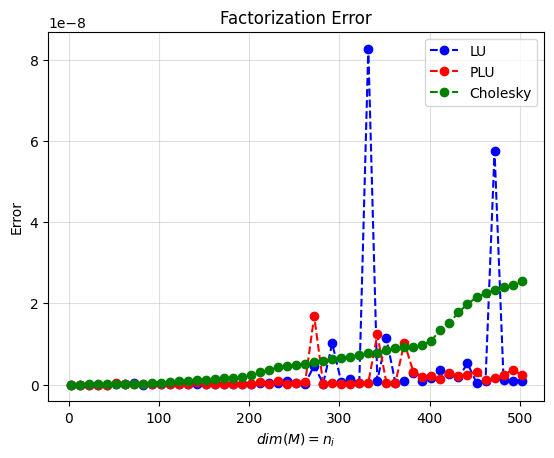

In [19]:
plt.plot(N, lu_errors_arr, 'b--o', label='LU')
plt.plot(N, plu_errors_arr, 'r--o', label='PLU')
plt.plot(N, cholesky_errors_arr, 'g--o', label='Cholesky')
plt.xlabel('$dim(M)=n_i$')
plt.ylabel('Error')
plt.title('Factorization Error')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

4. Como el error también depende de la matriz con la que se trabaja, lo anterior no es significativo, por lo que es mejor tomar una muestra para cada $n$ y obtener la media. Para cada $n_i$ del inciso anterior, calcula el error (de las factorizaciones LU, PLU y Cholesky) de 25 matrices y su correspondiente media y desviación estándar. La media de errores será el error asociado a la dimensión $n_i$. 

Para almacenar todos los errores se creara una matriz de tamaño 25x51, donde la i-ésima columna contiene los errores de 25 matrices diferentes de dimensión $n_i$.

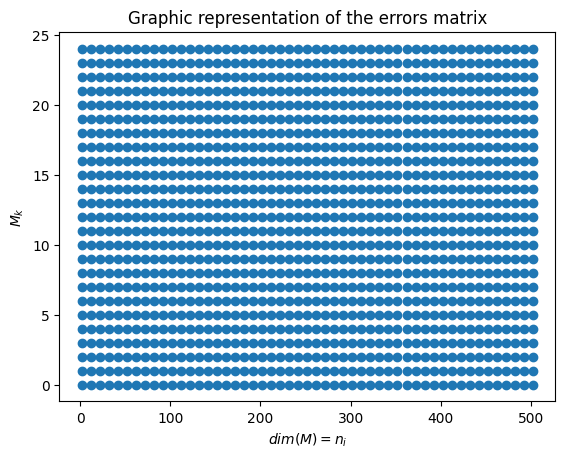

In [20]:
i = np.arange(25)
xx, yy = np.meshgrid(N, i)
plt.scatter(xx,yy)
plt.xlabel('$dim(M) = n_i$')
plt.ylabel('$M_k$')
plt.title('Graphic representation of the errors matrix')
plt.show()

Para calcular las medias de cada dimensión, bastará con calcular la media de cada columna de la matriz, y almacenarla en un nuevo arreglo.

### LU

In [21]:
lu_errors_mat = np.zeros((25, len(N)))
for i in range(25):
    for j in range(len(N)):
        M = scale*np.random.rand(N[j], N[j])
        L, U = lu_fact(M)
        lu_errors_mat[i, j] = lu_error(M, L, U)
# Calculating mean for every n (dimension)
lu_means = np.mean(lu_errors_mat, axis=0)

In [22]:
lu_means

array([6.70574707e-16, 2.92590651e-13, 9.39611023e-13, 4.80016329e-12,
       7.56524241e-12, 5.07000084e-11, 2.16110845e-11, 7.11094305e-11,
       4.10376434e-11, 9.42296868e-11, 1.47610587e-09, 7.50980821e-11,
       7.49360786e-11, 2.19487148e-10, 3.54272979e-10, 3.21198888e-10,
       1.46295395e-10, 3.51410750e-10, 2.97098532e-10, 4.39334462e-10,
       4.99351567e-10, 8.08769503e-10, 1.84092601e-09, 4.39269253e-09,
       8.21742207e-10, 9.06607820e-09, 7.98473491e-10, 6.39389770e-10,
       2.49455045e-09, 1.17871340e-09, 7.71315454e-09, 1.66132141e-09,
       2.76303729e-09, 2.34780974e-09, 9.19971453e-09, 2.05199043e-09,
       1.91053106e-09, 1.95146948e-09, 4.02517707e-09, 2.72991810e-09,
       6.61726002e-09, 1.93578307e-09, 6.43336702e-09, 8.08509122e-09,
       4.24143065e-09, 4.64270680e-09, 5.50934710e-09, 2.59167224e-09,
       2.07814402e-08, 6.32850739e-09, 4.13864242e-09])

### PLU

In [23]:
plu_errors_mat = np.zeros((25, len(N)))
for i in range(25):
    for j in range(len(N)):
        M = scale*np.random.rand(N[j], N[j])
        P, L, U = plu_fact(M)
        plu_errors_mat[i, j] = plu_error(M, P, L, U)
# Calculating mean for every dimension
plu_means = np.mean(plu_errors_mat, axis=0)

In [24]:
plu_means

array([3.19744231e-16, 5.21663715e-13, 1.30326409e-12, 3.14353692e-12,
       1.54264194e-11, 3.02415159e-11, 1.34249032e-11, 2.54838294e-10,
       3.31463200e-11, 6.82326964e-11, 9.35256904e-11, 9.25915376e-11,
       1.01047307e-10, 1.96591694e-10, 2.45097793e-10, 1.25157474e-10,
       3.44415638e-10, 1.91346998e-10, 2.48368631e-10, 5.52311343e-10,
       5.33182773e-10, 1.07183394e-09, 1.11710508e-09, 8.35256298e-10,
       6.20407422e-08, 8.16621900e-10, 4.10241135e-10, 1.35153873e-09,
       1.20563660e-09, 2.06477471e-09, 1.45011426e-09, 7.95236929e-09,
       1.01101795e-09, 2.97042748e-09, 1.05729810e-09, 2.10446850e-09,
       1.67950052e-09, 3.75279284e-09, 1.52561213e-09, 2.36118298e-09,
       7.39563122e-08, 3.80905006e-09, 2.36448700e-09, 3.94960746e-09,
       2.56488158e-09, 2.43481191e-09, 5.97092032e-09, 2.60721674e-09,
       4.86332584e-09, 1.86952314e-08, 6.67501244e-09])

### Cholesky

In [25]:
cholesky_errors_mat = np.zeros((25, len(N)))
for i in range(25):
    for j in range(len(N)):
        M = scale*np.random.rand(N[j], N[j])
        A = M @ M.T
        U = cholesky_fact(A)
        cholesky_errors_mat[i, j] = cholesky_error(A, U)
# Calculating mean for every dimension
cholesky_means = np.mean(cholesky_errors_mat, axis=0)

5. Grafica la media de errores asociados asociados a la factorización LU, PLU y Cholesky, en función de la dimensión de una sola gráfica. ¿Observas alguna tendencia conforme aumenta la dimensión?

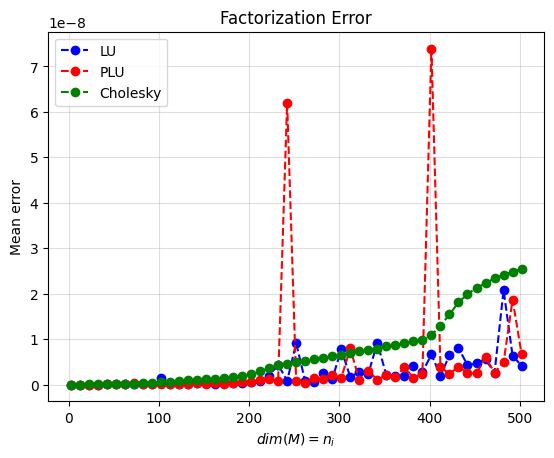

In [26]:
plt.plot(N, lu_means, 'b--o', label='LU')
plt.plot(N, plu_means, 'r--o', label='PLU')
plt.plot(N, cholesky_means, 'g--o', label='Cholesky')
plt.xlabel('$dim(M)=n_i$')
plt.ylabel('Mean error')
plt.title('Factorization Error')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

6. Grafica la desviación estándar para la factorización LU y PLU en función de la dimensión en una sola gráfica. ¿Observas alguna tendencia conforme aumenta la dimensión?

In [27]:
lu_std = np.std(lu_errors_mat, axis=0)
lu_std

array([1.20906499e-15, 3.94308595e-13, 8.02364711e-13, 5.80296181e-12,
       1.10464403e-11, 1.48359992e-10, 2.56333929e-11, 2.77117189e-10,
       3.74082473e-11, 2.15219179e-10, 6.99604227e-09, 8.04053030e-11,
       8.35136068e-11, 4.66300544e-10, 1.00605045e-09, 4.65925623e-10,
       1.15024734e-10, 3.82217664e-10, 3.40238643e-10, 8.31677161e-10,
       7.86485784e-10, 1.62364521e-09, 4.88959494e-09, 1.94296710e-08,
       9.03109513e-10, 3.82367526e-08, 1.45349998e-09, 5.63408078e-10,
       5.89778634e-09, 2.49750471e-09, 2.19764981e-08, 1.73826474e-09,
       5.43259644e-09, 6.16244309e-09, 3.95395959e-08, 3.01392292e-09,
       1.58362189e-09, 1.89644341e-09, 5.89345267e-09, 4.18234282e-09,
       2.01021925e-08, 2.02158905e-09, 1.43659666e-08, 2.76006384e-08,
       8.35672664e-09, 9.27019804e-09, 1.65068026e-08, 3.39721460e-09,
       6.29006631e-08, 1.00704931e-08, 4.51355053e-09])

In [28]:
plu_std = np.std(plu_errors_mat, axis=0)
plu_std

array([9.60876060e-16, 1.53699879e-12, 1.12802444e-12, 3.45125735e-12,
       4.11608967e-11, 5.81513503e-11, 1.53108582e-11, 9.31735438e-10,
       3.67445100e-11, 1.52118876e-10, 2.60918153e-10, 1.32336697e-10,
       1.15250828e-10, 4.21091918e-10, 4.79302408e-10, 1.59819830e-10,
       7.11758171e-10, 1.26539369e-10, 2.70390915e-10, 1.03781254e-09,
       8.17142691e-10, 1.98679762e-09, 3.32007913e-09, 1.27503239e-09,
       3.00960327e-07, 1.03382589e-09, 4.16907949e-10, 3.59046953e-09,
       2.00614204e-09, 4.01862785e-09, 1.98720889e-09, 2.60810103e-08,
       8.11829886e-10, 7.55637920e-09, 9.42433725e-10, 2.98439983e-09,
       1.91983110e-09, 8.51383444e-09, 1.12269355e-09, 4.42999466e-09,
       3.53917201e-07, 4.53996616e-09, 2.93041690e-09, 4.36900123e-09,
       2.06079411e-09, 2.79589883e-09, 1.20720622e-08, 2.90240703e-09,
       6.76711613e-09, 6.96504480e-08, 1.11412760e-08])

In [29]:
cholesky_std = np.std(cholesky_errors_mat, axis=0)
cholesky_std

array([7.00573088e-14, 7.08858806e-13, 1.75571254e-12, 3.53713205e-12,
       3.79892686e-12, 5.12256632e-12, 5.00160367e-12, 7.24037579e-12,
       1.70792803e-11, 2.18983718e-11, 2.36011665e-11, 1.78653274e-11,
       2.42296099e-11, 2.20976099e-11, 2.86859778e-11, 2.64097751e-11,
       2.55889478e-11, 2.44690133e-11, 4.03510255e-11, 5.11947494e-11,
       8.06292667e-11, 8.54118695e-11, 4.79692920e-11, 3.81619783e-11,
       3.24079242e-11, 3.47600030e-11, 4.19494043e-11, 5.20535742e-11,
       7.76221902e-11, 9.35497549e-11, 6.80107304e-11, 9.02164982e-11,
       1.65061019e-10, 1.38743388e-10, 1.60967451e-10, 2.07127773e-10,
       1.75940090e-10, 1.65440453e-10, 2.07635339e-10, 2.11360757e-10,
       2.04388385e-10, 3.48244058e-10, 3.34432074e-10, 2.80741596e-10,
       1.93499905e-10, 1.48598077e-10, 1.27769970e-10, 1.40047715e-10,
       1.77724227e-10, 2.03424108e-10, 2.00369613e-10])

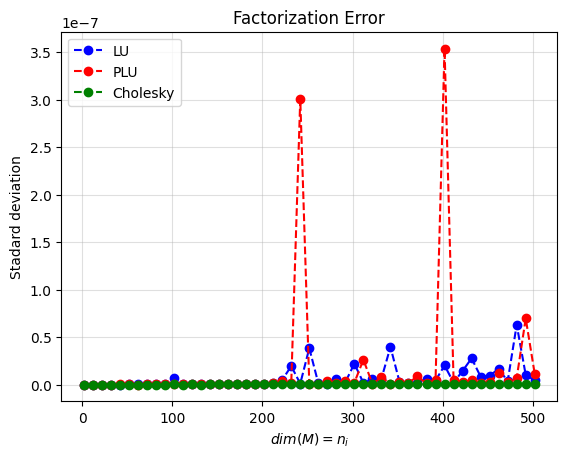

In [30]:
plt.plot(N, lu_std, 'b--o', label='LU')
plt.plot(N, plu_std, 'r--o', label='PLU')
plt.plot(N, cholesky_std, 'g--o', label='Cholesky')
plt.xlabel('$dim(M)=n_i$')
plt.ylabel('Stadard deviation')
plt.title('Factorization Error')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

7. La ***exactitud*** de un algoritmo se refiere a que tan cercana es la solución que da con respecto a la solución teórica. A partir de la gráfica anterior, ¿cuál dirías que es el algoritmo con mayor exactitud?

8. La ***precisión*** de un algoritmo se refiere a que tan repetitiva es una medición, por lo que podemos asociar una desviación estándar pequeña a una mejor precisión, puesto que el error es similar siempre. ¿Cuál dirías que es el algoritmo más preciso?

## **Estabilidad en la factorización PLU**

En las graficas anteriores, pudiste obtener que en algunos casos, la factorización LU se comportaba mejor que PLU. Esto se debe al hecho de que las matrices con las que se esta haciendo el análisis de errores, son muy específicas, ya que el comando
con el que se crean, hace que las entradas tengan una distribucion normal entre cero y uno.

1. Repite lo que se pide en el ejercicio 4 para matrices aleatorias que cumplan que el segundo renglón de $M_i$ sea igual al primer renglón, salvo en la segunda entrada donde

$$[M_i]_{22} = [M_i]_{12}+\epsilon$$

con $\epsilon \leq 10^{-15}$

In [31]:
epsilon = 1e-14

### LU

In [32]:
lu_errors_mat_2 = np.zeros((25, len(N)))
for i in range(25):
    for j in range(len(N)):
        M = scale*np.random.rand(N[j], N[j])
        M[0] = np.copy(M[1])
        M[1,1] += epsilon
        L, U = lu_fact(M)
        lu_errors_mat_2[i, j] = lu_error(M, L, U)
# Calculating mean for every n (dimension)
lu_means_2 = np.mean(lu_errors_mat_2, axis=0)

In [33]:
lu_means_2

array([0.00000000e+00, 3.76587408e-13, 1.61348628e-12, 5.58834232e-12,
       8.98857078e-12, 7.91683660e-12, 1.25940717e-11, 4.54325743e-11,
       2.83546867e-11, 2.49550769e-10, 4.02321209e-10, 1.39092701e-10,
       3.45904960e-10, 7.60444815e-11, 2.48304129e-09, 4.65006031e-10,
       3.46611249e-10, 1.65410519e-08, 4.41692954e-10, 4.29749439e-10,
       6.64470994e-10, 6.88780299e-10, 5.90320721e-10, 1.28452450e-09,
       9.92579649e-09, 8.96228439e-10, 2.71618084e-09, 2.92020735e-09,
       1.26463804e-09, 1.20864937e-07, 3.37110645e-09, 5.00084076e-09,
       1.71400807e-09, 1.47990398e-09, 3.78306242e-09, 5.79315623e-09,
       1.54556506e-09, 2.46977673e-09, 1.85425028e-09, 1.95777296e-09,
       2.64935821e-09, 4.44869959e-09, 7.04208888e-09, 7.85204049e-08,
       2.76870828e-09, 4.00883934e-09, 4.38060746e-09, 3.64358987e-09,
       4.76956776e-09, 3.00665862e-09, 5.63139382e-09])

### PLU

In [34]:
plu_errors_mat_2 = np.zeros((25, len(N)))
for i in range(25):
    for j in range(len(N)):
        M = scale*np.random.rand(N[j], N[j])
        M[0] = np.copy(M[1])
        M[1,1] += epsilon
        P, L, U = plu_fact(M)
        plu_errors_mat_2[i, j] = plu_error(M, P, L, U)
# Calculating mean for every n (dimension)
plu_means_2 = np.mean(plu_errors_mat_2, axis=0)

In [35]:
plu_means_2

array([0.00000000e+00, 8.45189965e-13, 2.91268562e-12, 5.24786226e-12,
       1.00141824e-11, 1.31642588e-11, 1.91319799e-11, 3.43760835e-10,
       3.24430350e-11, 1.35398145e-10, 6.95367686e-10, 1.83689749e-10,
       1.29685832e-10, 1.53980157e-10, 2.04457095e-10, 3.02999652e-10,
       2.09680829e-10, 2.75875627e-10, 2.17407811e-09, 4.52416732e-10,
       3.42676944e-10, 1.00867247e-09, 4.67767335e-10, 8.59463039e-10,
       1.69816253e-09, 1.54177679e-09, 1.25384126e-09, 2.90748126e-09,
       1.75674409e-09, 2.51264878e-09, 1.12059255e-09, 1.13299632e-09,
       4.23187885e-09, 1.35097218e-09, 1.19978420e-09, 4.47588012e-09,
       1.83852873e-09, 1.57128621e-09, 2.01882005e-09, 2.27887627e-09,
       4.28187721e-09, 2.59865401e-09, 1.22997233e-08, 6.99887349e-09,
       3.76173952e-09, 1.83388962e-08, 5.49923573e-09, 3.51914260e-09,
       3.85185056e-09, 2.16434367e-08, 5.37605621e-09])

2. Grafica los errores y las desviaciones estándar de forma análoga al ejercicio anterior y responde a las preguntas relacionadas con exactitud y precisión.

In [36]:
lu_std_2 = np.std(lu_errors_mat_2, axis=0)
lu_std_2

array([0.00000000e+00, 1.07138336e-12, 2.89364800e-12, 9.37903286e-12,
       1.56633528e-11, 6.18590919e-12, 1.07851502e-11, 8.68825167e-11,
       5.05063931e-11, 7.47392576e-10, 1.61176900e-09, 1.86057408e-10,
       1.12534281e-09, 4.23849773e-11, 1.11435191e-08, 1.62947229e-09,
       8.10603330e-10, 8.03288695e-08, 6.91636891e-10, 5.41085546e-10,
       1.06494789e-09, 8.66465221e-10, 6.60467508e-10, 2.69984098e-09,
       4.17870160e-08, 1.12414154e-09, 8.76344088e-09, 9.80569215e-09,
       2.48038556e-09, 5.81310127e-07, 8.90028571e-09, 1.51882136e-08,
       3.50132614e-09, 2.05670799e-09, 1.13192319e-08, 1.94786036e-08,
       2.00750926e-09, 3.79218037e-09, 1.46167990e-09, 2.27115013e-09,
       4.22198466e-09, 6.43266083e-09, 1.84555694e-08, 3.69765426e-07,
       3.71293684e-09, 8.84270424e-09, 5.25206142e-09, 3.81881897e-09,
       5.99513257e-09, 3.54327872e-09, 6.58095780e-09])

In [37]:
plu_std_2 = np.std(plu_errors_mat_2, axis=0)
plu_std_2

array([0.00000000e+00, 2.12463257e-12, 6.07863884e-12, 1.10553173e-11,
       1.95299393e-11, 2.52974919e-11, 3.09329431e-11, 9.02806195e-10,
       2.51371327e-11, 4.11922469e-10, 3.15531227e-09, 6.80471703e-10,
       2.32188284e-10, 1.27415179e-10, 2.75961985e-10, 4.22445524e-10,
       2.42851237e-10, 3.49752550e-10, 7.33148608e-09, 1.15867260e-09,
       3.36506920e-10, 1.36785678e-09, 5.96556596e-10, 1.23162854e-09,
       3.69258127e-09, 2.76368446e-09, 3.06829116e-09, 7.87492459e-09,
       2.59755393e-09, 7.37797553e-09, 1.31931886e-09, 7.27820197e-10,
       1.60875245e-08, 1.42020370e-09, 7.23775126e-10, 1.49887903e-08,
       2.69464824e-09, 1.64548252e-09, 2.31993620e-09, 3.11978322e-09,
       1.42319201e-08, 4.43486617e-09, 3.75273749e-08, 1.61982817e-08,
       6.20837201e-09, 6.45576343e-08, 9.91439006e-09, 3.58869596e-09,
       5.00315546e-09, 7.91762354e-08, 7.19389837e-09])

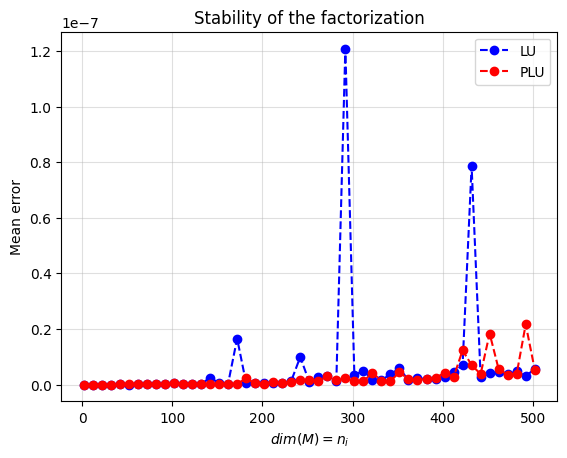

In [38]:
plt.plot(N, lu_means_2, 'b--o', label='LU')
plt.plot(N, plu_means_2, 'r--o', label='PLU')
plt.xlabel('$dim(M)=n_i$')
plt.ylabel('Mean error')
plt.title('Stability of the factorization')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

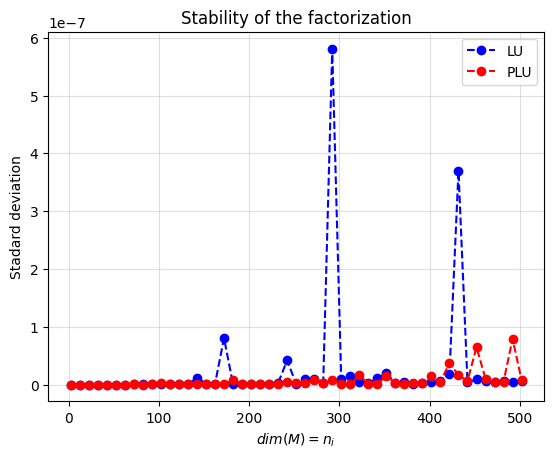

In [39]:
plt.plot(N, lu_std_2, 'b--o', label='LU')
plt.plot(N, plu_std_2, 'r--o', label='PLU')
plt.xlabel('$dim(M)=n_i$')
plt.ylabel('Stadard deviation')
plt.title('Stability of the factorization')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

A partir de la gráfica anterior, ¿cuál dirías que es el algoritmo con mayor exactitud?

¿Cuál dirías que es el algoritmo más preciso?